In [12]:
import pandas as pd

# Создадим файл для оценки пересечения с ампликонами с BRCA1

In [3]:
import pandas as pd

# Load the intersected BED file
intersected_bed_path = 'intersected.bed'
intersected_df = pd.read_csv(intersected_bed_path, sep='\t', header=None)

# Display the first few rows
print(intersected_df.head())




     0         1         2               3  4       5     6         7   \
0  chr1  47123873  47123989  AMPL7172749346  .  Pool=1  chr1  47100710   
1  chr1  47123873  47123989  AMPL7172749346  .  Pool=1  chr1  47100710   
2  chr1  47123873  47123989  AMPL7172749346  .  Pool=1  chr1  47100710   
3  chr1  47123873  47123989  AMPL7172749346  .  Pool=1  chr1  47100710   
4  chr1  54395615  54395735  AMPL7172749160  .  Pool=2  chr1  54387233   

         8             9   10 11        12        13  14  15  \
0  47131550  NM_001256418   0  -  47101447  47123834   0  10   
1  47131550  NM_001243728   0  -  47101447  47131320   0   9   
2  47134099     NM_022745   0  -  47101447  47134063   0   9   
3  47134099  NM_001042546   0  -  47101447  47134063   0   7   
4  54411496     NR_133633   0  -  54411496  54411496   0   7   

                                   16  \
0  932,108,96,48,51,63,51,91,109,232,   
1     932,108,96,48,51,63,51,109,232,   
2     932,108,96,48,51,63,51,109,371,   
3     

In [8]:
# Assuming intersected BED file has the following columns:
# amplicon_chrom, amplicon_start, amplicon_end, amplicon_name, ..., exon_chrom, exon_start, exon_end, exon_name, gene_name, ...

# Extract relevant columns for amplicons and their corresponding genes
amplicon_gene_df = intersected_df[[0, 1, 2, 3, 9]].drop_duplicates()

# Rename columns for clarity
amplicon_gene_df.columns = ['amplicon_chrom', 'amplicon_start', 'amplicon_end', 'amplicon_name', 'gene_name']

# Filter for BRCA1 amplicons
brca1_amplicons_df = amplicon_gene_df[amplicon_gene_df['gene_name'].str.contains('NM_007294')]

# Save the filtered amplicons to a new BED file
brca1_amplicons_bed_path = 'brca1_amplicons.bed'
brca1_amplicons_df.to_csv(brca1_amplicons_bed_path, sep='\t', header=False, index=False)

# Display the BRCA1 amplicons
print(brca1_amplicons_df)

     amplicon_chrom  amplicon_start  amplicon_end   amplicon_name  gene_name
1173          chr17        41196352      41196474  AMPL7170332747  NM_007294
1179          chr17        41197497      41197593  AMPL7173658617  NM_007294
1185          chr17        41197683      41197817  AMPL7170318453  NM_007294
1191          chr17        41197776      41197895  AMPL7170180149  NM_007294
1197          chr17        41199642      41199765  AMPL7174581697  NM_007294
...             ...             ...           ...             ...        ...
1611          chr17        41267641      41267767  AMPL7174425353  NM_007294
1617          chr17        41267746      41267863  AMPL7153550551  NM_007294
1623          chr17        41276006      41276121  AMPL7170318893  NM_007294
1629          chr17        41276130      41276249  AMPL7174429428  NM_007294
1634          chr17        41277292      41277400  AMPL7173738635  NM_007294

[78 rows x 5 columns]


# Оценим покрытие на ампликон

In [102]:
coverage_data = pd.read_csv('S1/S1_cover_mean.bedgraph', index_col=False, sep='\t', header=None,
                            names=['chrom', 'start', 'end', 'amplicon', 'gene','mean_coverage'])


In [104]:

# Расчет среднего покрытия для каждого региона
coverage_data['average_coverage'] = coverage_data['mean_coverage']

# Сохранение результата в файл
coverage_data.to_csv('S1/S1_brca1_average_coverage.txt', sep='\t', index=False)

print(coverage_data[['amplicon', 'average_coverage']])


          amplicon  average_coverage
0   AMPL7170332747        711.360657
1   AMPL7173658617        240.916672
2   AMPL7170318453        426.432831
3   AMPL7170180149        513.361328
4   AMPL7174581697        730.691040
..             ...               ...
73  AMPL7174425353        449.523804
74  AMPL7153550551        800.940185
75  AMPL7170318893        324.886963
76  AMPL7174429428         94.495796
77  AMPL7173738635        244.157410

[78 rows x 2 columns]


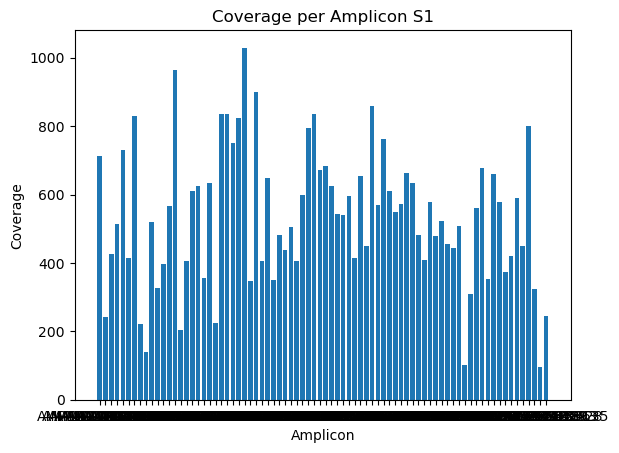

In [106]:
import matplotlib.pyplot as plt
plt.bar(coverage_data['amplicon'], coverage_data['average_coverage'])
plt.xlabel('Amplicon')
plt.ylabel('Coverage')
plt.title('Coverage per Amplicon S1')
plt.show()


In [96]:
coverage_data[coverage_data['average_coverage']<100]

,chrom,start,end,amplicon,gene,mean_coverage,average_coverage
76,chr17,41276130,41276249,AMPL7174429428,NM_007294,94.495796,94.495796


In [98]:
coverage_data['average_coverage'].describe()

count      78.000000
mean      536.701035
std       200.765180
min        94.495796
25%       407.393944
50%       541.063171
75%       659.476105
max      1029.205322
Name: average_coverage, dtype: float64

In [100]:
coverage_data['average_coverage'].mean()

536.7010351307692

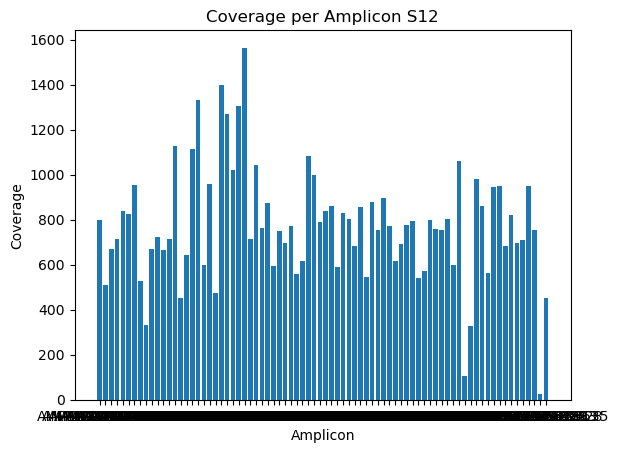

In [108]:
coverage_data = pd.read_csv('S12/S12_cover_mean.bedgraph', index_col=False, sep='\t', header=None,
                            names=['chrom', 'start', 'end', 'amplicon', 'gene','mean_coverage'])
coverage_data['average_coverage'] = coverage_data['mean_coverage']


# Сохранение результата в файл
coverage_data.to_csv('S12/S12_brca1_average_coverage.txt', sep='\t', index=False)
import matplotlib.pyplot as plt
plt.bar(coverage_data['amplicon'], coverage_data['average_coverage'])
plt.xlabel('Amplicon')
plt.ylabel('Coverage')
plt.title('Coverage per Amplicon S12')
plt.show()

In [67]:
coverage_data[coverage_data['average_coverage']<100]

,chrom,start,end,amplicon,gene,mean_coverage,average_coverage
76,chr17,41276130,41276249,AMPL7174429428,NM_007294,23.319328,23.319328


In [69]:
coverage_data['average_coverage'].describe()

count      78.000000
mean      773.639650
std       256.947918
min        23.319328
25%       624.483963
50%       761.322662
75%       876.810150
max      1564.142822
Name: average_coverage, dtype: float64

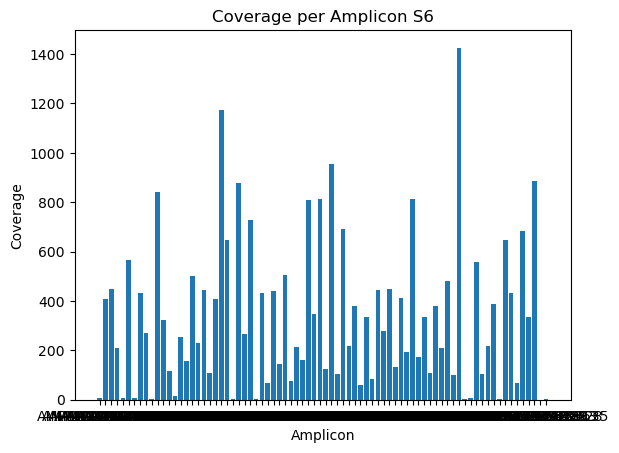

In [116]:
coverage_data = pd.read_csv('S6/S6_cover_mean.bedgraph', index_col=False, sep='\t', header=None,
                            names=['chrom', 'start', 'end', 'amplicon', 'gene','mean_coverage'])
coverage_data['average_coverage'] = coverage_data['mean_coverage']


# Сохранение результата в файл
coverage_data.to_csv('S6/S6_brca1_average_coverage.txt', sep='\t', index=False)
import matplotlib.pyplot as plt
plt.bar(coverage_data['amplicon'], coverage_data['average_coverage'])
plt.xlabel('Amplicon')
plt.ylabel('Coverage')
plt.title('Coverage per Amplicon S6')
plt.show()

In [120]:
print(*coverage_data[coverage_data['average_coverage']<100]['amplicon'].to_list(), sep = '\n')

AMPL7170332747
AMPL7174581697
AMPL7175081723
AMPL7170318872
AMPL7170318148
AMPL7170318684
AMPL7173658633
AMPL7170480030
AMPL7174424912
AMPL7170318098
AMPL7158524919
AMPL7174482705
AMPL7173232417
AMPL7173658658
AMPL7170318648
AMPL7174429428
AMPL7173738635


In [78]:
coverage_data['average_coverage'].describe()

count      78.000000
mean      342.048584
std       301.484998
min         0.487395
25%       105.395102
50%       276.030350
75%       446.689575
max      1425.702515
Name: average_coverage, dtype: float64

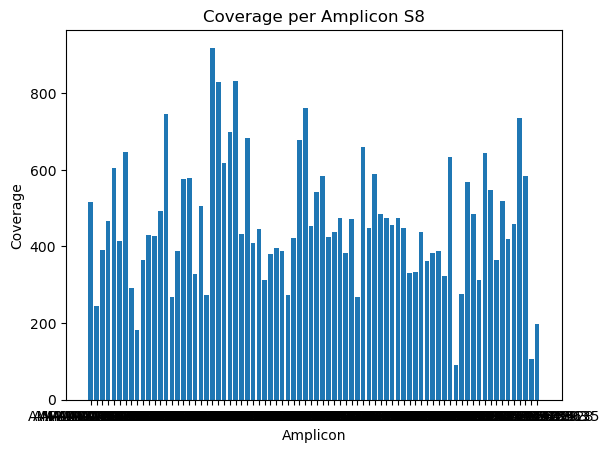

In [112]:
coverage_data = pd.read_csv('S8/S8_cover_mean.bedgraph', index_col=False, sep='\t', header=None,
                            names=['chrom', 'start', 'end', 'amplicon', 'gene','mean_coverage'])
coverage_data['average_coverage'] = coverage_data['mean_coverage']


# Сохранение результата в файл
coverage_data.to_csv('S8/S8_brca1_average_coverage.txt', sep='\t', index=False)
import matplotlib.pyplot as plt
plt.bar(coverage_data['amplicon'], coverage_data['average_coverage'])
plt.xlabel('Amplicon')
plt.ylabel('Coverage')
plt.title('Coverage per Amplicon S8')
plt.show()

In [82]:
coverage_data[coverage_data['average_coverage']<100]

,chrom,start,end,amplicon,gene,mean_coverage,average_coverage
63,chr17,41249155,41249282,AMPL7174482705,NM_007294,91.314964,91.314964


In [84]:
coverage_data['average_coverage'].describe()

count     78.000000
mean     463.713750
std      162.614292
min       91.314964
25%      368.929337
50%      446.882645
75%      572.768509
max      918.537659
Name: average_coverage, dtype: float64

# Оценим покрытие на позицию

In [64]:
import pandas as pd

# Load the coverage data
coverage_data_path = 'S1/S1_coverage_filtered.bedgraph'
coverage_df = pd.read_csv(coverage_data_path, sep='\t', header=None, names=['chrom', 'start', 'end', 'coverage'])


# Calculate average coverage for BRCA1 regions
brca1_avg_coverage = coverage_df['coverage'].mean()

# Identify positions with coverage below a threshold (e.g., 50)
low_coverage_positions = coverage_df[coverage_df['coverage'] < 50]

print(f"Average coverage for BRCA1: {brca1_avg_coverage}")
print(f"Positions with low coverage:\n{low_coverage_positions}")


Average coverage for BRCA1: 611.016418480336
Positions with low coverage:
      chrom     start       end  coverage
121   chr17  41203022  41203031         0
122   chr17  41203031  41203032         2
123   chr17  41203032  41203042         4
140   chr17  41203168  41203169         3
141   chr17  41203169  41203216         0
2292  chr17  41249155  41249235         0
2293  chr17  41249235  41249236         6
2294  chr17  41249236  41249246        13
2315  chr17  41249369  41249384         6
2316  chr17  41249384  41249385         3
2530  chr17  41267641  41267658         0
2531  chr17  41267658  41267660         1
2532  chr17  41267660  41267670         2
2533  chr17  41267670  41267671         5
2534  chr17  41267671  41267680         8
2603  chr17  41276229  41276239         6
2604  chr17  41276239  41276241         3
2605  chr17  41276241  41276249         0


In [152]:
import pandas as pd

# Load the coverage data
coverage_data_path = 'S12/S12_coverage_filtered.bedgraph'
coverage_df = pd.read_csv(coverage_data_path, sep='\t', header=None, names=['chrom', 'start', 'end', 'coverage'])


# Calculate average coverage for BRCA1 regions
brca1_avg_coverage = coverage_df['coverage'].mean()

# Identify positions with coverage below a threshold (e.g., 50)
low_coverage_positions = coverage_df[coverage_df['coverage'] < 50]

print(f"Average coverage for BRCA1: {brca1_avg_coverage}")
print(f"Positions with low coverage:\n{low_coverage_positions}")


Average coverage for BRCA1: 848.5264293419633
Positions with low coverage:
      chrom     start       end  coverage
161   chr17  41203022  41203031         0
162   chr17  41203031  41203032         3
163   chr17  41203032  41203037         6
164   chr17  41203037  41203042         7
185   chr17  41203168  41203177         2
186   chr17  41203177  41203179         1
187   chr17  41203179  41203216         0
2401  chr17  41249155  41249235         0
2402  chr17  41249235  41249236         2
2403  chr17  41249236  41249246         4
2430  chr17  41249369  41249384        10
2431  chr17  41249384  41249385         5
2686  chr17  41267641  41267670         0
2687  chr17  41267670  41267671         2
2688  chr17  41267671  41267680         4
2761  chr17  41276130  41276139        32
2762  chr17  41276139  41276140        30
2763  chr17  41276140  41276224        28
2764  chr17  41276224  41276225        27
2765  chr17  41276225  41276229        14
2766  chr17  41276229  41276239         2
2

In [154]:
import pandas as pd

# Load the coverage data
coverage_data_path = 'S6/S6_coverage_filtered.bedgraph'
coverage_df = pd.read_csv(coverage_data_path, sep='\t', header=None, names=['chrom', 'start', 'end', 'coverage'])


# Calculate average coverage for BRCA1 regions
brca1_avg_coverage = coverage_df['coverage'].mean()

# Identify positions with coverage below a threshold (e.g., 50)
low_coverage_positions = coverage_df[coverage_df['coverage'] < 50]

print(f"Average coverage for BRCA1: {brca1_avg_coverage}")
print(f"Positions with low coverage:\n{low_coverage_positions}")


Average coverage for BRCA1: 486.3029779887786
Positions with low coverage:
      chrom     start       end  coverage
0     chr17  41196352  41196474         6
105   chr17  41197834  41197835        41
106   chr17  41197835  41197837        15
107   chr17  41197837  41197895         2
108   chr17  41199642  41199765         8
...     ...       ...       ...       ...
2312  chr17  41276139  41276140         4
2313  chr17  41276140  41276249         0
2314  chr17  41277292  41277352         2
2315  chr17  41277352  41277354         1
2316  chr17  41277354  41277400         0

[221 rows x 4 columns]


In [156]:
import pandas as pd

# Load the coverage data
coverage_data_path = 'S8/S8_coverage_filtered.bedgraph'
coverage_df = pd.read_csv(coverage_data_path, sep='\t', header=None, names=['chrom', 'start', 'end', 'coverage'])


# Calculate average coverage for BRCA1 regions
brca1_avg_coverage = coverage_df['coverage'].mean()

# Identify positions with coverage below a threshold (e.g., 50)
low_coverage_positions = coverage_df[coverage_df['coverage'] < 50]

print(f"Average coverage for BRCA1: {brca1_avg_coverage}")
print(f"Positions with low coverage:\n{low_coverage_positions}")


Average coverage for BRCA1: 500.19984139571767
Positions with low coverage:
      chrom     start       end  coverage
118   chr17  41203022  41203031         0
119   chr17  41203031  41203032         1
120   chr17  41203032  41203042         2
135   chr17  41203168  41203216         0
2173  chr17  41249155  41249224         0
2174  chr17  41249224  41249225         1
2175  chr17  41249225  41249235         2
2176  chr17  41249235  41249236         8
2177  chr17  41249236  41249246        16
2209  chr17  41249369  41249384         6
2210  chr17  41249384  41249385         3
2445  chr17  41267641  41267670         0
2446  chr17  41267670  41267671         8
2447  chr17  41267671  41267672        16
2448  chr17  41267672  41267680        18
2510  chr17  41276229  41276239         6
2511  chr17  41276239  41276241         3
2512  chr17  41276241  41276249         0
